# 0. DATA Before QUAM

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import toolz as tz
import os 
from google.colab import drive
drive.mount('/content/drive')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly as py

Mounted at /content/drive


In [2]:
print(os.getcwd())
print(os.getcwd())
#os.chdir("/content/drive/MyDrive/Colab Notebooks/Datasets/Solar")
os.chdir("/content/drive/MyDrive/solar_data/")
files_dir = "/content/drive/MyDrive/solar_data/"
filename1 = files_dir + "Plant_1_Generation_Data.csv"
print(filename1)
print(os.getcwd())
filename2 = files_dir + "Plant_2_Generation_Data.csv"
filename3 = files_dir + "Plant_1_Weather_Sensor_Data.csv"
filename4 = files_dir + "Plant_2_Weather_Sensor_Data.csv"

/content
/content
/content/drive/MyDrive/solar_data/Plant_1_Generation_Data.csv
/content/drive/.shortcut-targets-by-id/1XvbpUD4ChFA848vDNzCAVsYxtjDRH-7w/solar_data


In [3]:
df_plant1 = pd.read_csv(filename1, parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_plant2 = pd.read_csv(filename2,parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_plant1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
df_weather1 = pd.read_csv(filename3,parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_weather2 = pd.read_csv(filename4,parse_dates=['DATE_TIME'], infer_datetime_format=True)
df_weather12 = pd.concat([df_weather1,df_weather2],axis=0)
df_weather12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6441 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            6441 non-null   datetime64[ns]
 1   PLANT_ID             6441 non-null   int64         
 2   SOURCE_KEY           6441 non-null   object        
 3   AMBIENT_TEMPERATURE  6441 non-null   float64       
 4   MODULE_TEMPERATURE   6441 non-null   float64       
 5   IRRADIATION          6441 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 352.2+ KB


In [5]:
timeinfoplant1 = df_plant1['DATE_TIME'].dt.time
dateinfoplant1= df_plant1['DATE_TIME'].dt.date

timeinfoplant2 = df_plant2['DATE_TIME'].dt.time
dateinfoplant2= df_plant2['DATE_TIME'].dt.date

#df_plant1['DATE'] = pd.to_datetime(dateinfoplant1.values,format='%Y-%m-%d',infer_datetime_format=False)
df_plant1['DATE'] = pd.to_datetime(dateinfoplant1.values)
df_plant1['TIME'] = timeinfoplant1
#df_plant2['DATE'] = pd.to_datetime(dateinfoplant2.values,format='%Y-%m-%d',infer_datetime_format=False)
df_plant2['DATE'] = pd.to_datetime(dateinfoplant2.values)
df_plant2['TIME'] = timeinfoplant2
df_plant1
pd.to_datetime(df_plant1['DATE'])
pd.to_datetime(df_plant2['DATE'])
df_plant12= pd.concat([df_plant1,df_plant2],axis = 0)
pd.to_datetime(df_plant12['DATE_TIME'])
df_plant12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 67697
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DATE_TIME    136476 non-null  datetime64[ns]
 1   PLANT_ID     136476 non-null  int64         
 2   SOURCE_KEY   136476 non-null  object        
 3   DC_POWER     136476 non-null  float64       
 4   AC_POWER     136476 non-null  float64       
 5   DAILY_YIELD  136476 non-null  float64       
 6   TOTAL_YIELD  136476 non-null  float64       
 7   DATE         136476 non-null  datetime64[ns]
 8   TIME         136476 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 10.4+ MB


In [6]:
pd.to_datetime(df_weather12['DATE_TIME'])
timeinfoweather12 = df_weather12['DATE_TIME'].dt.time
dateinfoweather12= df_weather12['DATE_TIME'].dt.date
df_weather12['DATE'] = pd.to_datetime(dateinfoweather12.values)
df_weather12['TIME'] = timeinfoweather12
pd.to_datetime(df_weather12['DATE'])
pd.to_datetime(df_weather12['DATE_TIME'])
df_weather12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6441 entries, 0 to 3258
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            6441 non-null   datetime64[ns]
 1   PLANT_ID             6441 non-null   int64         
 2   SOURCE_KEY           6441 non-null   object        
 3   AMBIENT_TEMPERATURE  6441 non-null   float64       
 4   MODULE_TEMPERATURE   6441 non-null   float64       
 5   IRRADIATION          6441 non-null   float64       
 6   DATE                 6441 non-null   datetime64[ns]
 7   TIME                 6441 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(2)
memory usage: 452.9+ KB


In [7]:
result12 = pd.merge(df_plant12,df_weather12, how ="left", on=["DATE","TIME","PLANT_ID"])
result12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 136475
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE_TIME_x          136476 non-null  datetime64[ns]
 1   PLANT_ID             136476 non-null  int64         
 2   SOURCE_KEY_x         136476 non-null  object        
 3   DC_POWER             136476 non-null  float64       
 4   AC_POWER             136476 non-null  float64       
 5   DAILY_YIELD          136476 non-null  float64       
 6   TOTAL_YIELD          136476 non-null  float64       
 7   DATE                 136476 non-null  datetime64[ns]
 8   TIME                 136476 non-null  object        
 9   DATE_TIME_y          136472 non-null  datetime64[ns]
 10  SOURCE_KEY_y         136472 non-null  object        
 11  AMBIENT_TEMPERATURE  136472 non-null  float64       
 12  MODULE_TEMPERATURE   136472 non-null  float64       
 13  IRRADIATION   

In [8]:
result12.info()


list =['DATE_TIME_x', 'PLANT_ID', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',\
       'TOTAL_YIELD', 'DATE', 'TIME', 'DATE_TIME_y', 'SOURCE_KEY_y', 'AMBIENT_TEMPERATURE', \
       'MODULE_TEMPERATURE', 'IRRADIATION']
list1 = ['DATE_TIME_x', 'PLANT_ID','SOURCE_KEY_x', 'DC_POWER', 'AC_POWER','DAILY_YIELD','DATE', 'TIME','AMBIENT_TEMPERATURE', \
       'MODULE_TEMPERATURE', 'IRRADIATION']       
#fig = px.scatter(result12,)
#fig = px.line(result12, x="DATE", y="DAILY_YIELD", title='DATE vs DAILY_YIELD')
#fig.show()

#fig = px.line(result12, x="DATE", y="DAILY_YIELD", title='DATE vs DAILY_YIELD')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 136476 entries, 0 to 136475
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE_TIME_x          136476 non-null  datetime64[ns]
 1   PLANT_ID             136476 non-null  int64         
 2   SOURCE_KEY_x         136476 non-null  object        
 3   DC_POWER             136476 non-null  float64       
 4   AC_POWER             136476 non-null  float64       
 5   DAILY_YIELD          136476 non-null  float64       
 6   TOTAL_YIELD          136476 non-null  float64       
 7   DATE                 136476 non-null  datetime64[ns]
 8   TIME                 136476 non-null  object        
 9   DATE_TIME_y          136472 non-null  datetime64[ns]
 10  SOURCE_KEY_y         136472 non-null  object        
 11  AMBIENT_TEMPERATURE  136472 non-null  float64       
 12  MODULE_TEMPERATURE   136472 non-null  float64       
 13  IRRADIATION   

In [14]:
result12

,DATE_TIME_x,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME,DATE_TIME_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,00:00:00,2020-05-15 00:00:00,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136471,2020-06-17 23:45:00,4136001,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0,2020-06-17,23:45:00,2020-06-17 23:45:00,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
136472,2020-06-17 23:45:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0,2020-06-17,23:45:00,2020-06-17 23:45:00,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
136473,2020-06-17 23:45:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0,2020-06-17,23:45:00,2020-06-17 23:45:00,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0
136474,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0,2020-06-17,23:45:00,2020-06-17 23:45:00,iq8k7ZNt4Mwm3w0,23.202871,22.535908,0.0


# Solar Power Models for regression

## 1.Predict Total Daily yield for both plants(all inverters) date-wise

In [17]:
result_plant = result12.groupby(['PLANT_ID','SOURCE_KEY_x','DATE']).agg({'DC_POWER': 'sum', 'AC_POWER': 'sum', 'DAILY_YIELD': 'max', 'IRRADIATION': 'max','MODULE_TEMPERATURE':'max' ,'AMBIENT_TEMPERATURE':'max'}).reset_index()
result_plant
#print(result_plant_Model1[result_plant_Model1['PLANT_ID']==4135001] .describe())
#print(result_plant_Model1[result_plant_Model1['PLANT_ID']==4136001] .describe())

,PLANT_ID,SOURCE_KEY_x,DATE,DC_POWER,AC_POWER,DAILY_YIELD,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE
0,4135001,1BY6WEcLGh8j5v7,2020-05-15,235340.696429,23046.550595,5754.000000,0.893661,55.030613,34.430943
1,4135001,1BY6WEcLGh8j5v7,2020-05-16,256629.875001,25124.491072,6292.000000,0.812241,54.232746,32.524149
2,4135001,1BY6WEcLGh8j5v7,2020-05-17,288039.821438,28172.850000,7045.000000,0.997904,63.145582,35.252486
3,4135001,1BY6WEcLGh8j5v7,2020-05-18,204030.303569,19970.507143,4998.000000,0.971481,53.936739,28.367100
4,4135001,1BY6WEcLGh8j5v7,2020-05-19,232277.267856,22741.176786,6449.000000,0.835832,51.847742,30.368632
...,...,...,...,...,...,...,...,...,...
1459,4136001,xoJJ8DcxJEcupym,2020-06-13,27443.737619,26840.577619,6632.000000,0.927124,51.008646,31.910203
1460,4136001,xoJJ8DcxJEcupym,2020-06-14,30768.782381,30088.969524,7268.000000,0.921356,52.985789,32.956087
1461,4136001,xoJJ8DcxJEcupym,2020-06-15,25597.239048,25049.489524,7412.666667,0.829677,48.458500,31.613734
1462,4136001,xoJJ8DcxJEcupym,2020-06-16,22335.691429,21870.634286,6203.200000,0.768459,46.364629,30.833513


DC Power in KW and Total yield in MW

In [21]:
result_plant_Model1 = result_plant.groupby(['PLANT_ID','DATE']).agg({'DC_POWER': 'sum', 'AC_POWER': 'sum', 'DAILY_YIELD': 'sum', 'IRRADIATION': 'max','MODULE_TEMPERATURE':'max','AMBIENT_TEMPERATURE':'max' }).reset_index()
result_plant_Model1['PLANT_ID']=result_plant_Model1['PLANT_ID'].astype(int)
result_plant_Model1


,PLANT_ID,DATE,DC_POWER,AC_POWER,DAILY_YIELD,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE
0,4135001,2020-05-15,5.627239e+06,550830.959402,137473.000000,0.893661,55.030613,34.430943
1,4135001,2020-05-16,5.806138e+06,568359.821428,142114.000000,0.812241,54.232746,32.524149
2,4135001,2020-05-17,6.759595e+06,660975.389285,165106.000000,0.997904,63.145582,35.252486
3,4135001,2020-05-18,4.812549e+06,470969.708929,117738.000000,0.971481,53.936739,28.367100
4,4135001,2020-05-19,5.437955e+06,532250.491070,149637.125000,0.835832,51.847742,30.368632
...,...,...,...,...,...,...,...,...
63,4136001,2020-06-13,4.553058e+05,445507.764286,120462.590476,0.927124,51.008646,31.910203
64,4136001,2020-06-14,5.059115e+05,495073.503333,135946.600000,0.921356,52.985789,32.956087
65,4136001,2020-06-15,4.109989e+05,402322.124286,119852.309524,0.829677,48.458500,31.613734
66,4136001,2020-06-16,4.808101e+05,470830.427143,122253.800000,0.768459,46.364629,30.833513


### Plots

In [20]:
fig = px.scatter(result_plant_Model1, x="DATE", y="DAILY_YIELD", title='DATE vs DAILY_YIELD', color = 'PLANT_ID',hover_data=['PLANT_ID'])
fig.show()

In [24]:
import datetime as dt
result_plant_Model1['DATE'] = pd.to_datetime(result_plant_Model1['DATE'])
result_plant_Model1['DATE_NUM']=result_plant_Model1['DATE'].map(dt.datetime.toordinal)

In [25]:
result_plant_Model1

,PLANT_ID,DATE,DC_POWER,AC_POWER,DAILY_YIELD,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,DATE_NUM
0,4135001,2020-05-15,5.627239e+06,550830.959402,137473.000000,0.893661,55.030613,34.430943,737560
1,4135001,2020-05-16,5.806138e+06,568359.821428,142114.000000,0.812241,54.232746,32.524149,737561
2,4135001,2020-05-17,6.759595e+06,660975.389285,165106.000000,0.997904,63.145582,35.252486,737562
3,4135001,2020-05-18,4.812549e+06,470969.708929,117738.000000,0.971481,53.936739,28.367100,737563
4,4135001,2020-05-19,5.437955e+06,532250.491070,149637.125000,0.835832,51.847742,30.368632,737564
...,...,...,...,...,...,...,...,...,...
63,4136001,2020-06-13,4.553058e+05,445507.764286,120462.590476,0.927124,51.008646,31.910203,737589
64,4136001,2020-06-14,5.059115e+05,495073.503333,135946.600000,0.921356,52.985789,32.956087,737590
65,4136001,2020-06-15,4.109989e+05,402322.124286,119852.309524,0.829677,48.458500,31.613734,737591
66,4136001,2020-06-16,4.808101e+05,470830.427143,122253.800000,0.768459,46.364629,30.833513,737592


In [26]:
import sklearn.preprocessing

# Standardize with a min-max scaler
result_plant_Model1_Std =result_plant_Model1.copy()
scaler = sklearn.preprocessing.StandardScaler()
features = ["IRRADIATION","DATE_NUM","MODULE_TEMPERATURE","AMBIENT_TEMPERATURE"]
for feature in features:
  result_plant_Model1_Std[feature] = scaler.fit_transform(result_plant_Model1_Std[[feature]].values)
display(result_plant_Model1_Std)

,PLANT_ID,DATE,DC_POWER,AC_POWER,DAILY_YIELD,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,DATE_NUM
0,4135001,2020-05-15,5.627239e+06,550830.959402,137473.000000,-0.477481,-0.296279,0.536004,-1.681836
1,4135001,2020-05-16,5.806138e+06,568359.821428,142114.000000,-1.126236,-0.437189,-0.113660,-1.579906
2,4135001,2020-05-17,6.759595e+06,660975.389285,165106.000000,0.353112,1.136884,0.815912,-1.477977
3,4135001,2020-05-18,4.812549e+06,470969.708929,117738.000000,0.142575,-0.489465,-1.530008,-1.376047
4,4135001,2020-05-19,5.437955e+06,532250.491070,149637.125000,-0.938261,-0.858398,-0.848066,-1.274118
...,...,...,...,...,...,...,...,...,...
63,4136001,2020-06-13,4.553058e+05,445507.764286,120462.590476,-0.210857,-1.006588,-0.322838,1.274118
64,4136001,2020-06-14,5.059115e+05,495073.503333,135946.600000,-0.256817,-0.657410,0.033506,1.376047
65,4136001,2020-06-15,4.109989e+05,402322.124286,119852.309524,-0.987304,-1.456963,-0.423848,1.477977
66,4136001,2020-06-16,4.808101e+05,470830.427143,122253.800000,-1.475082,-1.826756,-0.689677,1.579906


### KNN Regressor

In [27]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [28]:
import datetime as dt
result_plant_Model1['DATE'] = pd.to_datetime(result_plant_Model1['DATE'])
result_plant_Model1['DATE_NUM']=result_plant_Model1['DATE'].map(dt.datetime.toordinal)

In [29]:
import sklearn.preprocessing

# Standardize with a min-max scaler
result_plant_Model1_Std =result_plant_Model1.copy()
scaler = sklearn.preprocessing.StandardScaler()
features = ["IRRADIATION","DATE_NUM"]
for feature in features:
  result_plant_Model1_Std[feature] = scaler.fit_transform(result_plant_Model1_Std[[feature]].values)
display(result_plant_Model1_Std)

,PLANT_ID,DATE,DC_POWER,AC_POWER,DAILY_YIELD,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,DATE_NUM
0,4135001,2020-05-15,5.627239e+06,550830.959402,137473.000000,-0.477481,55.030613,34.430943,-1.681836
1,4135001,2020-05-16,5.806138e+06,568359.821428,142114.000000,-1.126236,54.232746,32.524149,-1.579906
2,4135001,2020-05-17,6.759595e+06,660975.389285,165106.000000,0.353112,63.145582,35.252486,-1.477977
3,4135001,2020-05-18,4.812549e+06,470969.708929,117738.000000,0.142575,53.936739,28.367100,-1.376047
4,4135001,2020-05-19,5.437955e+06,532250.491070,149637.125000,-0.938261,51.847742,30.368632,-1.274118
...,...,...,...,...,...,...,...,...,...
63,4136001,2020-06-13,4.553058e+05,445507.764286,120462.590476,-0.210857,51.008646,31.910203,1.274118
64,4136001,2020-06-14,5.059115e+05,495073.503333,135946.600000,-0.256817,52.985789,32.956087,1.376047
65,4136001,2020-06-15,4.109989e+05,402322.124286,119852.309524,-0.987304,48.458500,31.613734,1.477977
66,4136001,2020-06-16,4.808101e+05,470830.427143,122253.800000,-1.475082,46.364629,30.833513,1.579906


In [37]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(result_plant_Model1_Std, test_size=0.4,shuffle = True)
X_train = df_train.iloc[:, [5,6,7,8]]
X_train.info()
#isna()
X_test = df_test.iloc[:, [5,6,7,8]]

#Make last column into feature into the output i.e. Label (y)
y_train = df_train['DAILY_YIELD']
y_test = df_test['DAILY_YIELD']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 67 to 17
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IRRADIATION          40 non-null     float64
 1   MODULE_TEMPERATURE   40 non-null     float64
 2   AMBIENT_TEMPERATURE  40 non-null     float64
 3   DATE_NUM             40 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB


In [38]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [39]:
yhat_test = knn_regressor.predict(X_test)

display(r2_score(y_test, yhat_test))

0.19504676165874424

### Feature Selection with Lasso

In [40]:
m_train, n = X_train.shape
m_validation = X_test.shape[0]
m_test = X_test.shape[0]

In [41]:
from sklearn.linear_model import Lasso
alpha = 1e-4
num_non_zero_weights = n
while num_non_zero_weights > 2:
  print("Regularization coefficient:", alpha)
  lasso_regressor = Lasso(alpha=alpha)
  lasso_regressor.fit(X_train, y_train)
  num_non_zero_weights = (lasso_regressor.coef_ != 0).sum()
  print("Number of non-zero weights is", num_non_zero_weights)
  alpha *= 1.1

Regularization coefficient: 0.0001
Number of non-zero weights is 4
Regularization coefficient: 0.00011000000000000002
Number of non-zero weights is 4
Regularization coefficient: 0.00012100000000000003
Number of non-zero weights is 4
Regularization coefficient: 0.00013310000000000004
Number of non-zero weights is 4
Regularization coefficient: 0.00014641000000000006
Number of non-zero weights is 4
Regularization coefficient: 0.00016105100000000008
Number of non-zero weights is 4
Regularization coefficient: 0.0001771561000000001
Number of non-zero weights is 4
Regularization coefficient: 0.00019487171000000012
Number of non-zero weights is 4
Regularization coefficient: 0.00021435888100000014
Number of non-zero weights is 4
Regularization coefficient: 0.00023579476910000016
Number of non-zero weights is 4
Regularization coefficient: 0.00025937424601000017
Number of non-zero weights is 4
Regularization coefficient: 0.0002853116706110002
Number of non-zero weights is 4
Regularization coeffic

In [42]:
np.where(lasso_regressor.coef_ != 0)

(array([1, 2]),)

In [43]:
top_2_features = np.where(lasso_regressor.coef_ != 0)[0]
display(top_2_features)

array([1, 2])

In [44]:
X_train.columns[top_2_features]

Index(['MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE'], dtype='object')

### DT Regressor

In [45]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
import graphviz
from sklearn.tree import export_graphviz

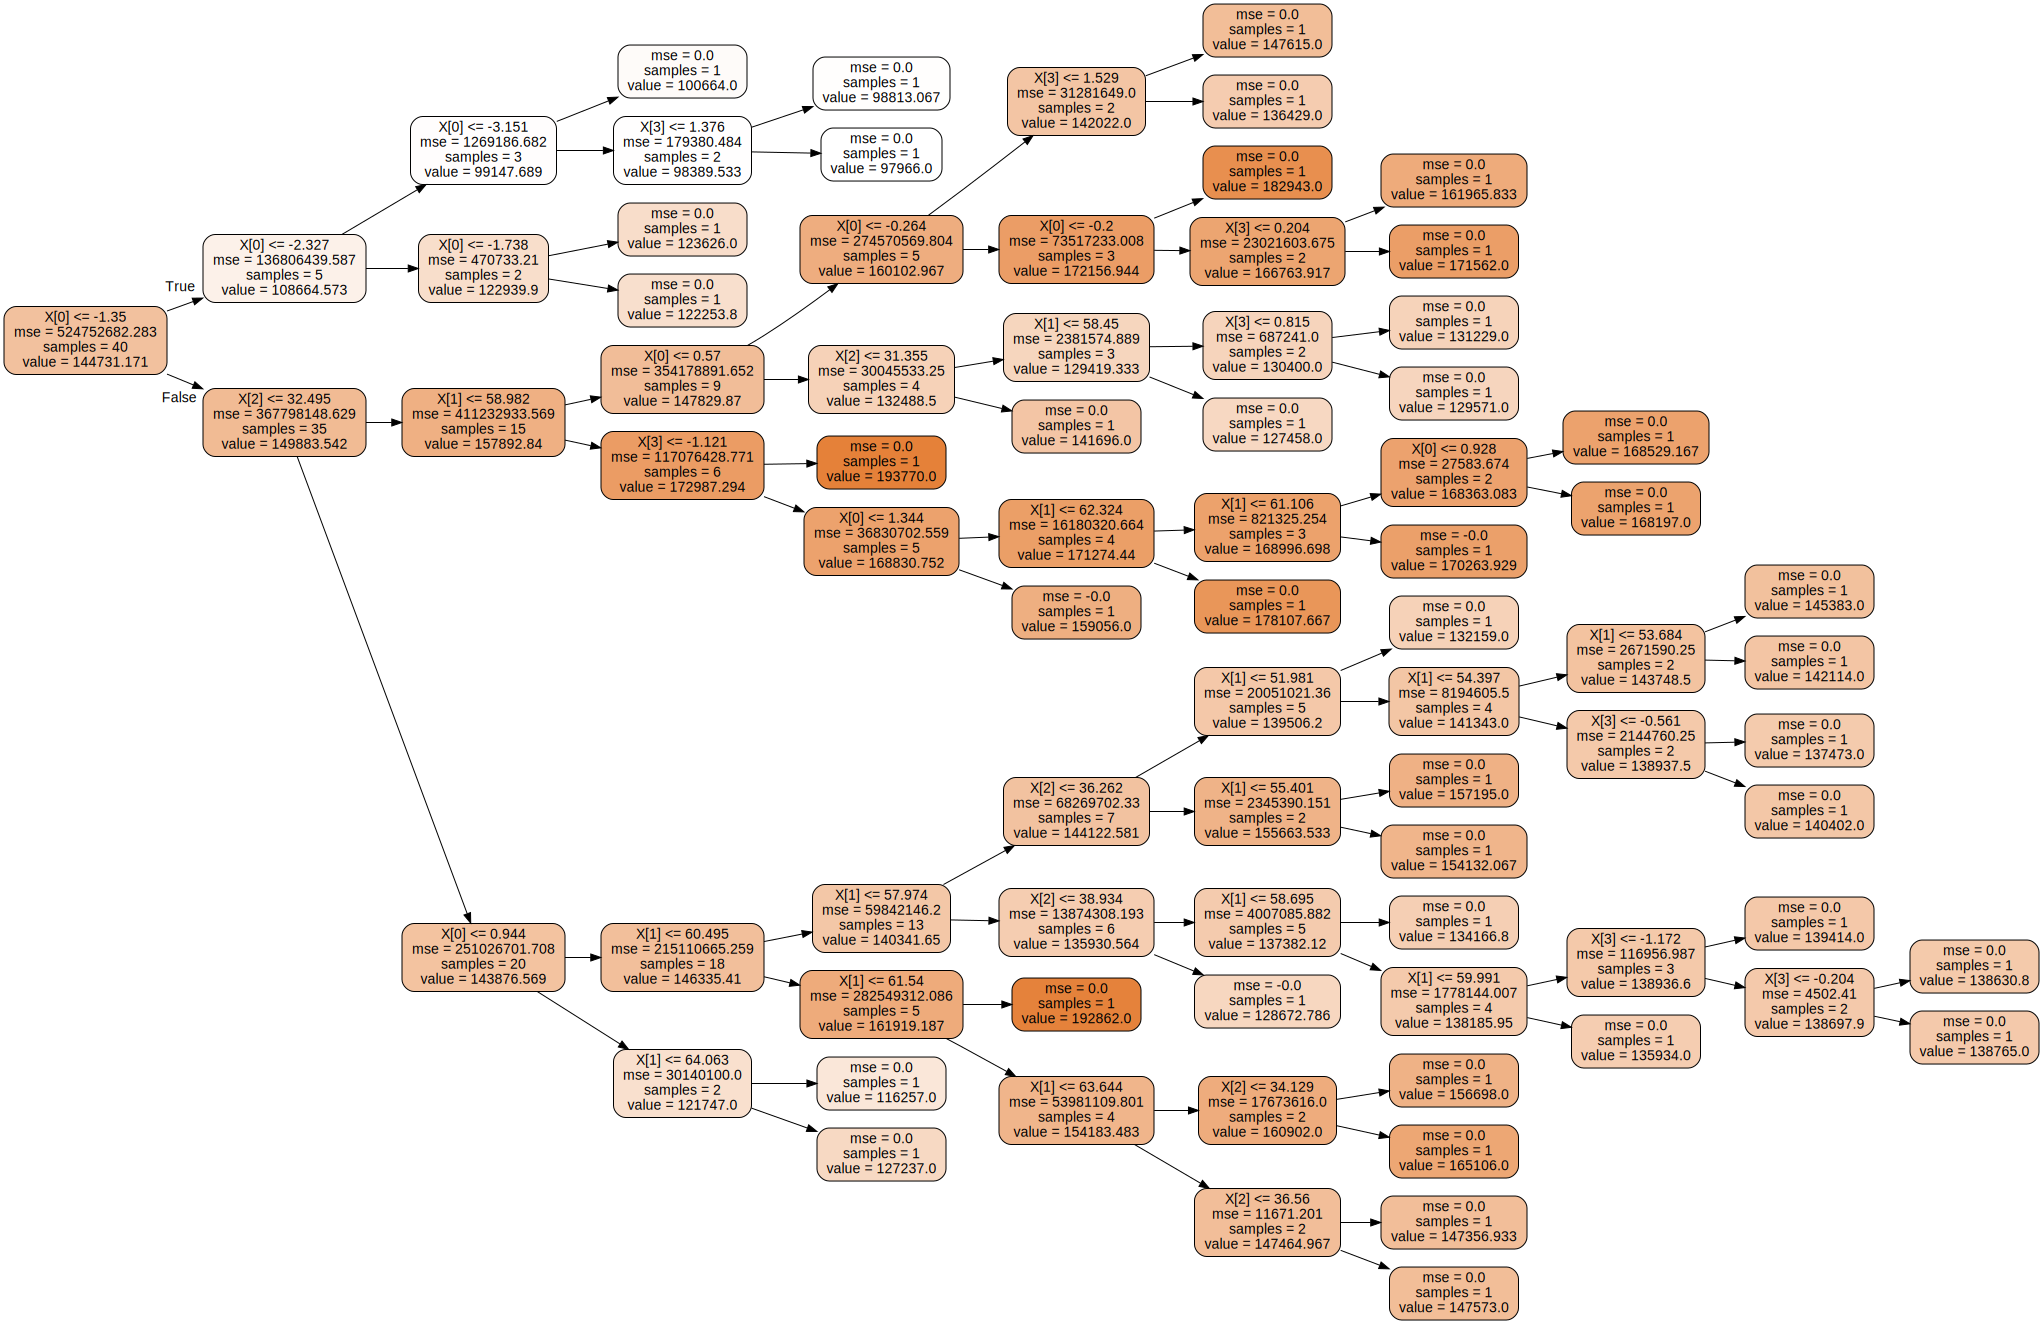

In [47]:
dot_data = export_graphviz(dt_regressor,
                           out_file=None, 
                           filled=True,
                           rounded=True,  
                           rotate=True)  

display(graphviz.Source(dot_data))

### Variance and bias of DT

In [48]:
from sklearn.utils import resample

In [50]:
def estimate_model_bias_variance(estimator, X_train, y_train, X_test, y_test, \
                                 num_trials, resample_size):

  yhat_test_trial = np.tile(y_test[:, None], (1, num_trials))

  for i in range(num_trials):
    X_train_trial, y_train_trial = \
      resample(X_train, y_train, replace=False, n_samples=resample_size)
    estimator.fit(X_train_trial, y_train_trial)
    yhat_test_trial[:, i] = estimator.predict(X_test)

  prediction_variances = yhat_test_trial.std(axis=1)
  model_variance_estimate = prediction_variances.mean()
  model_variance_std = prediction_variances.std()
  prediction_mae = np.abs(yhat_test_trial - y_test[:, None]).mean(axis=1)
  model_bias_estimate = prediction_mae.mean()
  model_bias_std = prediction_mae.std()

  return (model_bias_estimate, model_variance_estimate, \
          model_bias_std, model_variance_std)

In [32]:
m_train, n = X_train.shape
num_trials = 100
resample_size = m_train // 2
bias, variance, bstd, sstd = estimate_model_bias_variance(dt_regressor, X_train, y_train, \
                                              X_test, y_test, \
                                              num_trials, resample_size)

print("bias:", bias, "+/-", bstd)
print("variance:", variance, "+/-", sstd)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



bias: 21098.48005531682 +/- 9077.699532590917
variance: 16673.011951809614 +/- 2422.0176150210254
